## Stellar Emission Models

Below we describe a number of different emission models describing the emission from stars and their natal birth clouds. 
We provide details on each stellar model, as well as information on the keys from the underlying grid that are extracted where necessary.

First, we need a `grid` to pass to each model; here we load our test grid:

In [1]:
from synthesizer.emission_models.attenuation import PowerLaw
from synthesizer.emission_models.dust.emission import Blackbody
from synthesizer.grid import Grid
from unyt import Myr, dimensionless, kelvin

# Get the grid which we'll need for extraction
grid_dir = "../../../../tests/test_grid"
grid_name = "test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)

### IncidentEmission

Incident emission is the pure stellar emission from a population of stars, usually defined by a SPS model. 
Incident emission has not been processed by natal birth clouds, or in any other way through a photoionisation code.

Specifically, an incident emission model defines the extraction of the ``"incident"`` SPS spectra key from a grid file.

In [2]:
from synthesizer.emission_models import IncidentEmission

incident = IncidentEmission(grid=grid)
print(incident)

|==== EmissionModel: incident ====|
|---------------------------------|
|  INCIDENT (stellar)             |
|---------------------------------|
|Extraction model:                |
|  Grid: test_grid                |
|  Extract key: incident          |
|  Escape fraction: 0.0           |
|  Save emission: True            |
|=================================|


### LineContinuumEmission

Line continuum emission defines the emission of lines from a stellar population, typically from the natal birth cloud surrounding young stars.
Here we also use a *mask*, since nebular line emission is typically from young stars still surrounded by their birth cloud.

Specifically, a line continuum model defines the extraction of the ``"linecont"`` reprocessed SPS spectra key from a grid file.

In [3]:
from synthesizer.emission_models import LineContinuumEmission

line_cont = LineContinuumEmission(
    grid, fesc=0.8, mask_attr="ages", mask_op="<", mask_thresh=10 * Myr
)
print(line_cont)

|==== EmissionModel: linecont ====|
|---------------------------------|
|  LINECONT (stellar)             |
|---------------------------------|
|Extraction model:                |
|  Grid: test_grid                |
|  Extract key: linecont          |
|  Escape fraction: 0.8           |
|  Save emission: True            |
|  Masks:                         |
|    - ages < 10 Myr              |
|=================================|


### TransmittedEmission 

Transmitted emission is the incident emission that is transmitted through the gas when reprocessed using a photoionisation model.
Unlike incident emission, transmitted emission has little flux below the Lyman-limit, since it is typically absorbed by the neutral gas (depending on ``fesc``).

A transmitted model defines the extraction of the ``"transmitted"`` reprocessed SPS spectra key from a grid file, with some escape fraction.

In [4]:
from synthesizer.emission_models import TransmittedEmission

transmitted = TransmittedEmission(grid=grid, fesc=0.1)
print(transmitted)

|==== EmissionModel: transmitted ====|
|------------------------------------|
|  TRANSMITTED (stellar)             |
|------------------------------------|
|Extraction model:                   |
|  Grid: test_grid                   |
|  Extract key: transmitted          |
|  Escape fraction: 0.1              |
|  Save emission: True               |
|====================================|


### EscapedEmission

Escaped emission is the portion of the incident emission which, when reprocessed using a photoionsaition code, fully escapes without being affected by the gas.

An escaped model defines the extraction of the ``"transmitted"`` reprocessed SPS spectra key from a grid file, with some escape fraction (i.e. ``escaped = fesc * incident``).

In [5]:
from synthesizer.emission_models import EscapedEmission

escaped = EscapedEmission(grid, fesc=0.1)
print(escaped)

|====== EmissionModel: escaped ======|
|------------------------------------|
|  ESCAPED (stellar)                 |
|------------------------------------|
|Extraction model:                   |
|  Grid: test_grid                   |
|  Extract key: transmitted          |
|  Escape fraction: 0.9              |
|  Save emission: True               |
|====================================|


Notice here that the "escape fraction" for the escaped model is ``1 - fesc``, because escaped is the inverse of transmitted.

### NebularContinuumEmission

Nebular continuum emission is the continuum emission coming directly from the nebular birth cloud of a stellar population.
A nebular continuum model defines the extraction of the ``"nebular_continuum"`` reprocessed SPS spectra key from a grid file.

Like ``LineContinuum`` we also use a mask here, since nebular continuum is typically dominated by young stars still surrounded by their natal birth clouds.


In [6]:
from synthesizer.emission_models import NebularContinuumEmission

nebular_cont = NebularContinuumEmission(
    grid, fesc=0.2, mask_attr="ages", mask_op="<", mask_thresh=10 * Myr
)
print(nebular_cont)

|==== EmissionModel: nebular_continuum ====|
|------------------------------------------|
|  NEBULAR_CONTINUUM (stellar)             |
|------------------------------------------|
|Extraction model:                         |
|  Grid: test_grid                         |
|  Extract key: nebular_continuum          |
|  Escape fraction: 0.2                    |
|  Save emission: True                     |
|  Masks:                                  |
|    - ages < 10 Myr                       |
|==========================================|


### NebularEmission

Nebular emission is the emission from the gas surrounding a (typically young) stellar population.
Unlike other models we've shown so far, ``NebularEmission`` comes in two forms depending on whether a Lyman-$\alpha$ escape fraction is provided.
If a Lyman-$\alpha$ escape fraction less than 1.0 is passed then ``NebularEmission`` is the combination of ``LineContinuumEmission`` and ``NebularContinuum``.
If not, it is an extraction of the ``"nebular"`` reprocessed SPS spectra.

Again, as for ``LineContinuumEmission`` and ``NebularContinuum``, we'll include a mask for young stars.

|==== EmissionModel: nebular ====|
|--------------------------------|
|  NEBULAR (stellar)             |
|--------------------------------|
|Extraction model:               |
|  Grid: test_grid               |
|  Extract key: nebular          |
|  Escape fraction: 0.0          |
|  Save emission: True           |
|================================|

|================ EmissionModel: nebular ===============|
|-------------------------------------------------------|
|  NEBULAR_CONTINUUM (stellar)                          |
|-------------------------------------------------------|
|Extraction model:                                      |
|  Grid: test_grid                                      |
|  Extract key: nebular_continuum                       |
|  Escape fraction: 0.1                                 |
|  Save emission: True                                  |
|  Masks:                                               |
|    - ages < 10 Myr                                    |
|----------

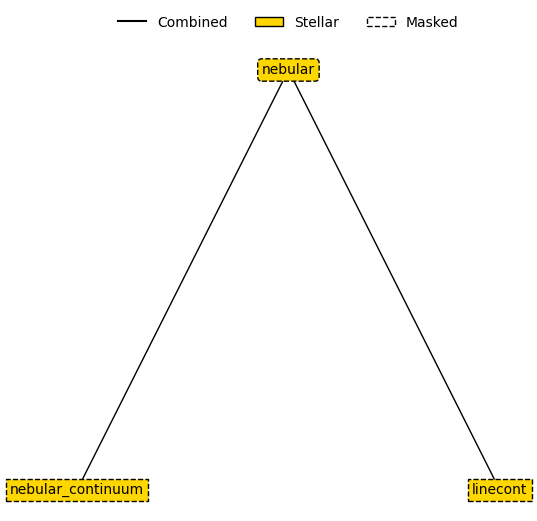

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [7]:
from synthesizer.emission_models import NebularEmission

nebular_extract = NebularEmission(grid)
print(nebular_extract)
print()

nebular_combined = NebularEmission(
    grid,
    fesc=0.1,
    fesc_ly_alpha=0.8,
    mask_attr="ages",
    mask_op="<",
    mask_thresh=10 * Myr,
)
print(nebular_combined)
nebular_combined.plot_emission_tree()

The ``NebularEmission`` model is our first example of a model model with child models (``LineCont`` and ``NebularContinuuum``).
For more complex models like this we can plot the "emission tree" to visualise the model.
When the model is eventually used to generate emission, the model will be traversed bottom to top (breadth first), generating each spectra in the tree.

### ReprocessedEmission 

Reprocessed emission is the stellar emission which has been reprocessed by gas (i.e. the combination of the reprocessed spectra we saw above, transmitted and nebular).

A reprocessed model defines the combination of ``TransmittedEmission`` and ``NebularEmission``.

|============== EmissionModel: reprocessed =============|
|-------------------------------------------------------|
|  TRANSMITTED (stellar)                                |
|-------------------------------------------------------|
|Extraction model:                                      |
|  Grid: test_grid                                      |
|  Extract key: transmitted                             |
|  Escape fraction: 0.1                                 |
|  Save emission: True                                  |
|-------------------------------------------------------|
|  LINECONT (stellar)                                   |
|-------------------------------------------------------|
|Extraction model:                                      |
|  Grid: test_grid                                      |
|  Extract key: linecont                                |
|  Escape fraction: 0.8                                 |
|  Save emission: True                                  |
|-------------

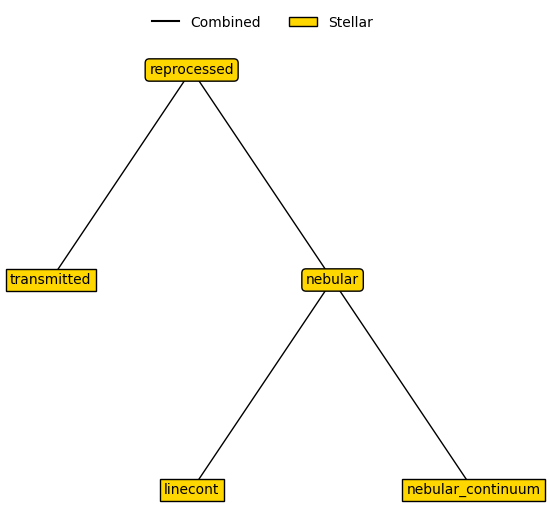

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [8]:
from synthesizer.emission_models import ReprocessedEmission

reprocessed = ReprocessedEmission(grid, fesc=0.1, fesc_ly_alpha=0.8)
print(reprocessed)
reprocessed.plot_emission_tree()

### IntrinsicEmission

Intrinsic emission is the total stellar emission, including all photoionisation reprocessing, prior to dust attenuation.
Effectively, intrinsic emission is the emission that is "incident" on the dust distribution.
Note that this does not take account of any dust within the birth cloud; this is typically modelled internally within a photoionisation code.

An intrinsic model defines the combination of ``EscapedEmission`` and ``ReprocessedEmission``.

|=========== EmissionModel: intrinsic ===========|
|------------------------------------------------|
|  ESCAPED (stellar)                             |
|------------------------------------------------|
|Extraction model:                               |
|  Grid: test_grid                               |
|  Extract key: transmitted                      |
|  Escape fraction: 0.9                          |
|  Save emission: True                           |
|------------------------------------------------|
|  NEBULAR (stellar)                             |
|------------------------------------------------|
|Extraction model:                               |
|  Grid: test_grid                               |
|  Extract key: nebular                          |
|  Escape fraction: 0.1                          |
|  Save emission: True                           |
|------------------------------------------------|
|  TRANSMITTED (stellar)                         |
|------------------------------

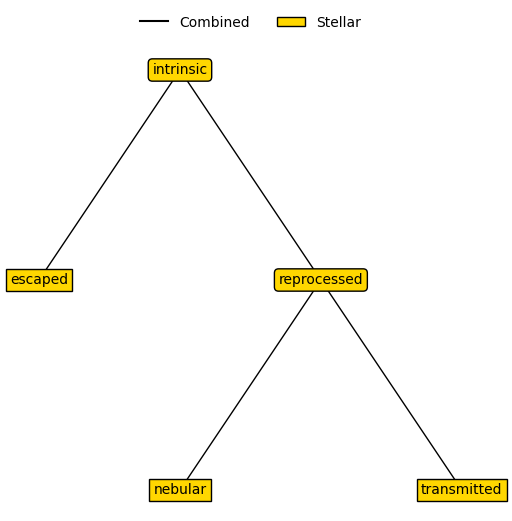

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [9]:
from synthesizer.emission_models import IntrinsicEmission

intrinsic = IntrinsicEmission(grid, fesc=0.1, fesc_ly_alpha=1.0)
print(intrinsic)
intrinsic.plot_emission_tree()

### EmergentEmission 

Emergent emission is the dust attenuated intrinsic emission, i.e. the stellar emission, post nebular attenuation and post dust attenuation.
We haven't seen the Attenuation model yet, since this is a "common" model, and will be covered below.

An emergent model is a combination of ``EscapedEmission`` and ``AttenuatedEmission``.

|======================================= EmissionModel: emergent ========================================|
|--------------------------------------------------------------------------------------------------------|
|  TRANSMITTED (stellar)                                                                                 |
|--------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                       |
|  Grid: test_grid                                                                                       |
|  Extract key: transmitted                                                                              |
|  Escape fraction: 0.1                                                                                  |
|  Save emission: True                                                                                   |
|------------------------------------

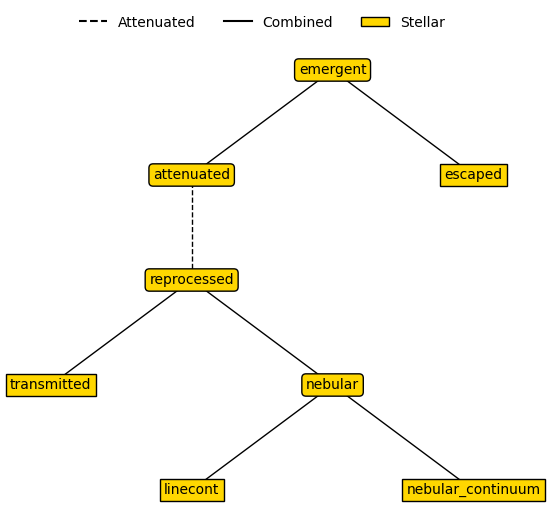

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [10]:
from synthesizer.emission_models import EmergentEmission

emergent = EmergentEmission(
    grid=grid,
    dust_curve=PowerLaw(slope=-1),
    apply_dust_to=reprocessed,
    tau_v=0.67,
    fesc=0.2,
)
print(emergent)
emergent.plot_emission_tree()

### TotalEmission

The Total emission is the combined emission from the stellar population (post dust attenuation) along with the thermal emission from dust.

Once again, dust emission is a common model and is covered [here](common_models.ipynb). A total model is a combination of ``DustEmission`` and ``EmergentEmission``.


|================================================ EmissionModel: total ===============================================|
|---------------------------------------------------------------------------------------------------------------------|
|  LINECONT (stellar)                                                                                                 |
|---------------------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                                    |
|  Grid: test_grid                                                                                                    |
|  Extract key: linecont                                                                                              |
|  Escape fraction: 0.7                                                                                               |
|  Save emission: True                  

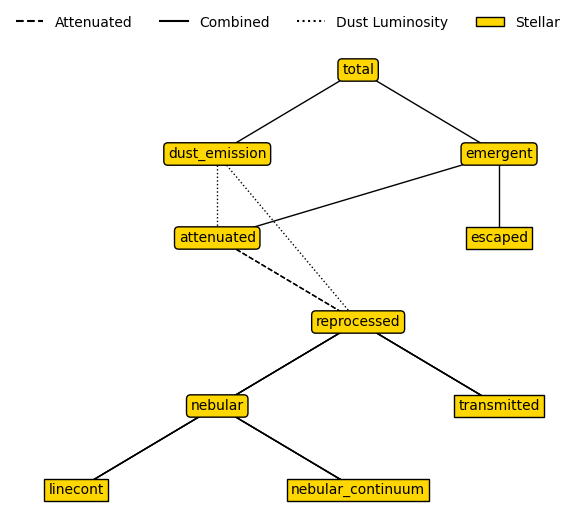

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [11]:
from synthesizer.emission_models import TotalEmission

total = TotalEmission(
    grid=grid,
    dust_curve=PowerLaw(slope=-1),
    tau_v=0.67,
    fesc=0.2,
    fesc_ly_alpha=0.7,
    dust_emission_model=Blackbody(temperature=100 * kelvin),
)
print(total)
total.plot_emission_tree()

Note that omitting `dust_emission_model` when initialising `TotalEmission` will result in a simpler model, where `total` is identical to `emergent`.

### CharlotFall2000

In addition to the simpler models shown above we also provide three more complex emission models.
The first of these follows [Charlot&Fall+2000](https://ui.adsabs.harvard.edu/abs/2000ApJ...539..718C/abstract), which splits the stellar population into young and old populations (with the threshold defined by ``age_pivot``), with specific dust attenuation parameters for each population.

|================================================ EmissionModel: total ===============================================|
|---------------------------------------------------------------------------------------------------------------------|
|  YOUNG_TRANSMITTED (stellar)                                                                                        |
|---------------------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                                    |
|  Grid: test_grid                                                                                                    |
|  Extract key: transmitted                                                                                           |
|  Escape fraction: 0.0                                                                                               |
|  Save emission: True                  

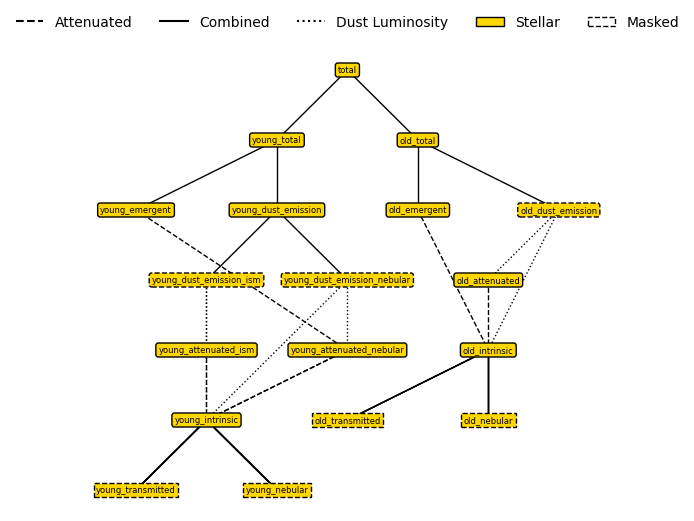

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [12]:
from synthesizer.emission_models import CharlotFall2000

cf_model = CharlotFall2000(
    grid=grid,
    tau_v_ism=1.0,
    tau_v_nebular=0.7,
    dust_curve_ism=PowerLaw(slope=-0.7),
    dust_curve_nebular=PowerLaw(slope=-1.3),
    age_pivot=7 * dimensionless,
    dust_emission_ism=Blackbody(temperature=50 * kelvin),
    dust_emission_nebular=Blackbody(temperature=100 * kelvin),
)
print(cf_model)
cf_model.plot_emission_tree(fontsize=6)

If we omit the dust emission model then we get a simpler model with a root at ``"emergent"``.

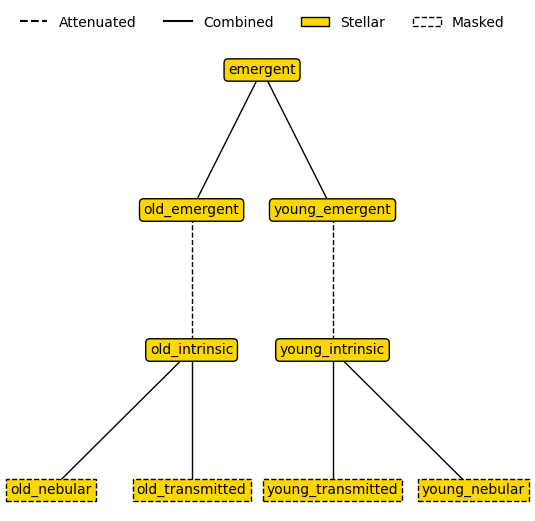

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [13]:
cf_model = CharlotFall2000(
    grid=grid,
    tau_v_ism=1.0,
    tau_v_nebular=0.7,
    dust_curve_ism=PowerLaw(slope=-0.7),
    dust_curve_nebular=PowerLaw(slope=-1.3),
    age_pivot=7 * dimensionless,
)
cf_model.plot_emission_tree()

It's also possible to plot a subtree within a model by passing the root of the subtree. This is particularly helpful for models like `CharlotFall2000` which define a lot of extra spectra that don't necessarily appear in the main tree depending on the exact inputs. You can see this in the plots below which show the trees defining the "extra" spectra available when using ``CharlotFall2000`` (and indeed ``PacmanEmission`` and ``BimodelPacmanEmission`` which we'll cover shortly).

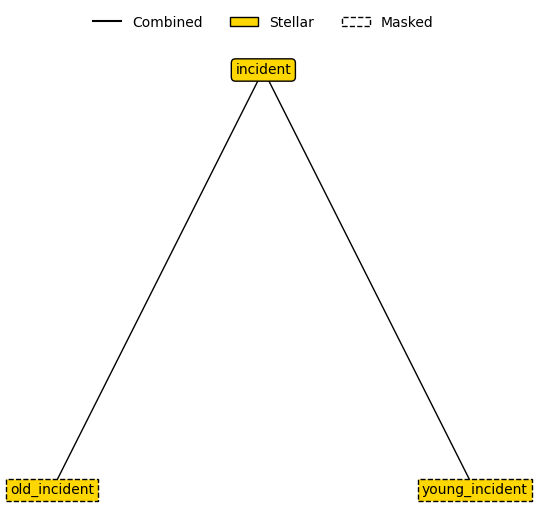

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [14]:
cf_model.plot_emission_tree(root="incident")

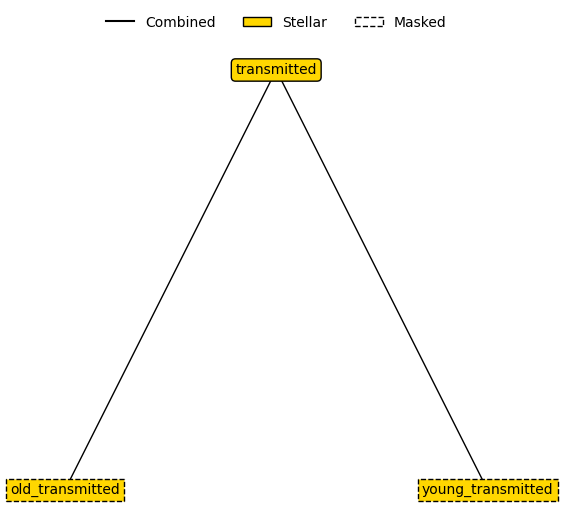

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [15]:
cf_model.plot_emission_tree(root="transmitted")

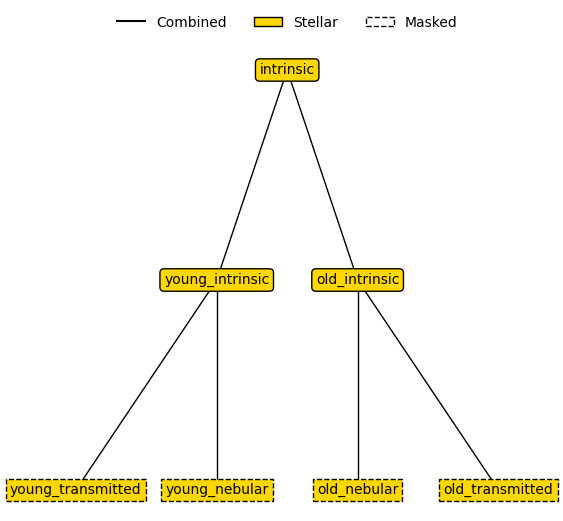

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [16]:
cf_model.plot_emission_tree(root="intrinsic")

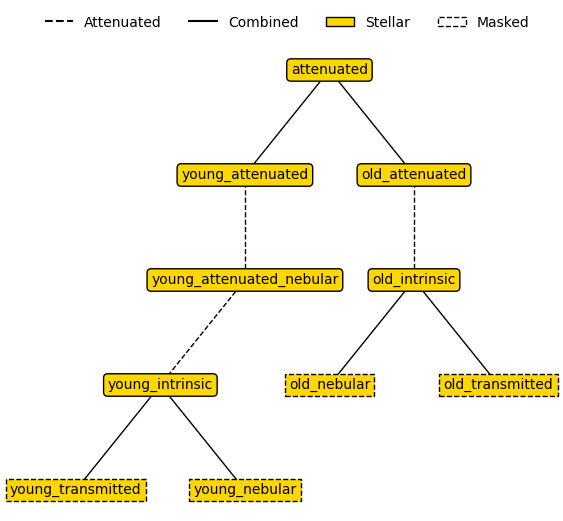

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [17]:
cf_model.plot_emission_tree(root="attenuated")

### PacmanEmission

We also implement a general model which accounts for escape fractions.
We call this the "Pacman" model.

Pacman calculates dust attenuated spectra, including an escape fraction and variable Lyman-$\alpha$ transmission.
In this model, some fraction (``fesc``) of the pure stellar emission is able to completely escape the galaxy without reprocessing by gas or dust. The rest is assumed to be reprocessed by both gas and a screen of dust. 

The Pacman model has two forms: the first is the ``PacmanEmission`` model, which does not differentiate between young and old populations.

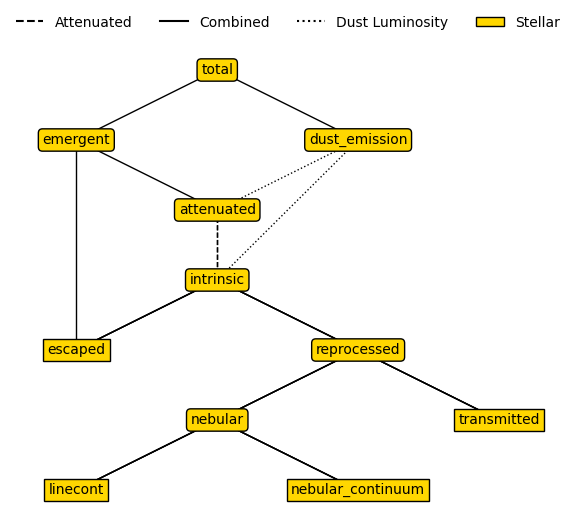

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [18]:
from synthesizer.emission_models import PacmanEmission

# Simple Pacman with dust emission
simple_pc_model = PacmanEmission(
    grid=grid,
    tau_v=0.7,
    dust_curve=PowerLaw(slope=-1.3),
    dust_emission=Blackbody(temperature=100 * kelvin),
    fesc=0.2,
    fesc_ly_alpha=0.9,
)
simple_pc_model.plot_emission_tree()

Again, omitting the ``dust_emission_model`` will result in a model with ``"emergent"`` at it's root.

### BiomodalPacmanEmission

The second flavour of the Pacman model is the ``BimodalPacmanEmission`` model, which is the same as ``PacmanEmission`` in every other respect, but does differentiate between old and young populations, analogous to [Charlot&Fall+2000](https://ui.adsabs.harvard.edu/abs/2000ApJ...539..718C/abstract).
The young component feels attenuation from both the ISM and birth clouds, while the old component only feels attenuation from the ISM.

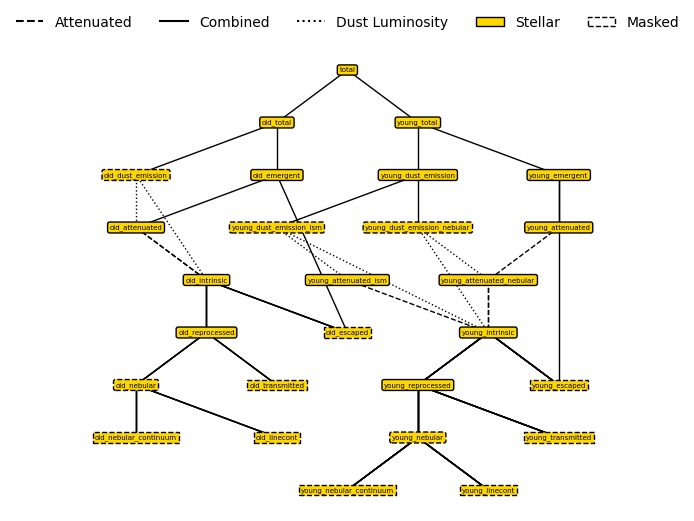

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [19]:
from synthesizer.emission_models import BimodalPacmanEmission

pc_model = BimodalPacmanEmission(
    grid=grid,
    tau_v_ism=1.0,
    tau_v_nebular=0.7,
    dust_curve_ism=PowerLaw(slope=-1.3),
    dust_curve_nebular=PowerLaw(slope=-0.7),
    dust_emission_ism=Blackbody(temperature=100 * kelvin),
    dust_emission_nebular=Blackbody(temperature=30 * kelvin),
    fesc=0.2,
    fesc_ly_alpha=0.9,
)
pc_model.plot_emission_tree(fontsize=5)

And as with the other models the dust emission can be omitted, leaving ``"emergent"`` at the root.